In [90]:
import pandas as pd

# matplotlib helps to draw graphs and charts
import matplotlib.pyplot as plt

# seaborn makes nicer graphs and charts
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [60]:
mnist = pd.read_csv("data/train.csv")

In [61]:
mnist.shape

(42000, 785)

In [62]:
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [63]:
# Separate features and labels
Y = mnist['label']          # target
X = mnist.drop(columns=['label'])  # image pixels

In [64]:
print("X shape:", X.shape)
print("y shape:", Y.shape)

X shape: (42000, 784)
y shape: (42000,)


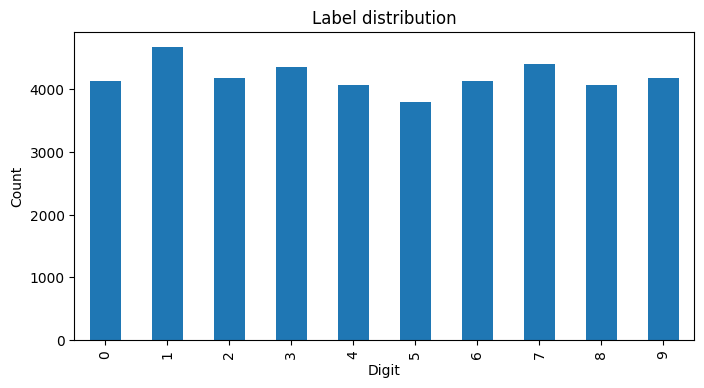

In [66]:
plt.figure(figsize=(8,4))
y.value_counts().sort_index().plot(kind='bar')  # Counts how many times each digit appears
plt.title("Label distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


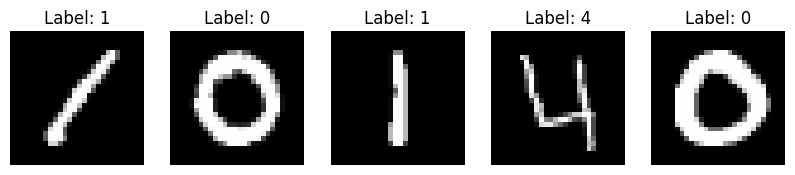

In [67]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Label: {Y[i]}")
    plt.axis('off')
plt.show()

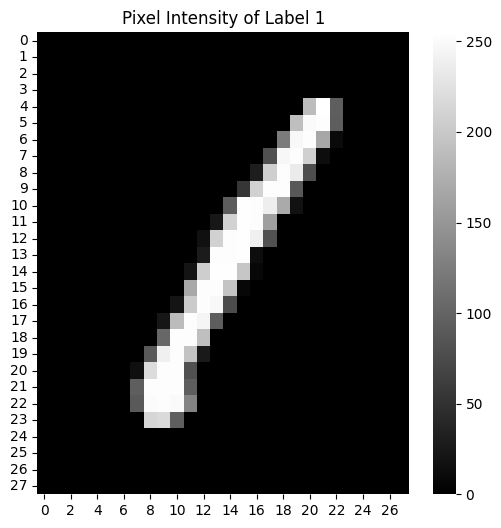

In [68]:
#iloc[0] gets the first row

sample_image = X.iloc[0].values.reshape(28,28)
plt.figure(figsize=(6,6))
sns.heatmap(sample_image, cmap='gray' )
plt.title(f"Pixel Intensity of Label {Y[0]}")
plt.show()

In [69]:
#normalize pixel values
X = X / 255.0


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [81]:
model = LogisticRegression(max_iter=1000)

In [82]:
print(type(Y_train))
print(Y_train.shape)


<class 'pandas.core.frame.DataFrame'>
(8400, 784)


In [83]:
print(X.shape)  # (n_samples, 784)
print(Y.shape)  # (n_samples,)
print(type(Y))  # pandas Series ✅


(42000, 784)
(42000,)
<class 'pandas.core.series.Series'>


In [86]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(33600, 784) (8400, 784)
(33600,) (8400,)


In [87]:
model.fit(X_train, y_train)  


LogisticRegression(max_iter=1000)

In [88]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9189285714285714


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.90      0.87      0.89       937
           4       0.92      0.93      0.93       839
           5       0.85      0.88      0.87       702
           6       0.93      0.96      0.94       785
           7       0.93      0.92      0.92       893
           8       0.90      0.88      0.89       835
           9       0.91      0.90      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



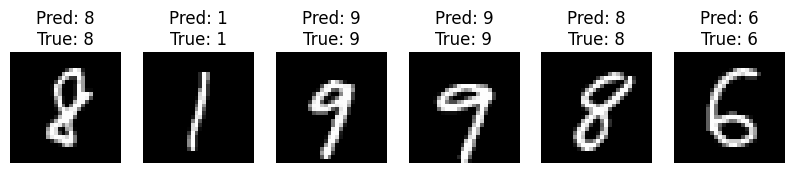

In [94]:
plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test.iloc[i]}")
    plt.axis('off')